In [18]:
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.vi_eval_predictor import (
    ViEvalPredictor as Model,
)
from vol_predict.models.baselines.naive_predictor import NaivePredictor as Baseline

from run import run_backtest, initialize_sequential_runner

In [20]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_sequential_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Available data from 2018-06-04 23:00:00 to 2018-09-30 21:00:00


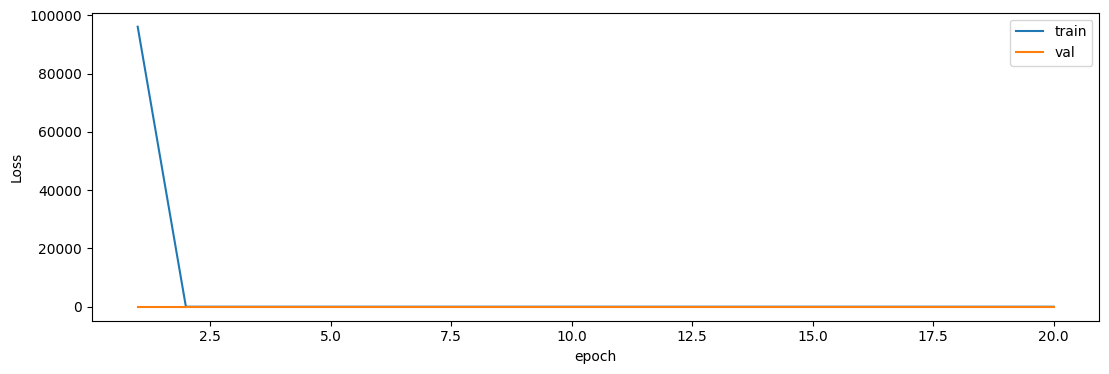

In [21]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [22]:
result

,model_loss,baseline_loss,true_returns,true_vols,model_preds,baseline_preds
datetime,,,,,,
2018-06-30,-9.479562,-8.309954,"[-0.0026883667, -0.004259642, 0.0017928587, 0....","[0.00041156381, 0.0004322233, 0.00021497025, 0...","[6.484886e-05, 6.794683e-05, 6.806603e-05, 6.7...","[0.00023757516, 0.00023757516, 0.00023757516, ..."
2018-07-03,-8.614741,-8.035577,[-0.008161686],[0.00024051484],[6.270195e-05],[0.00024728957]
2018-07-04,-8.995046,-8.120697,"[0.00045824194, 0.001279179, -0.00041435525, 0...","[0.00017250539, 0.00017690947, 0.00018171575, ...","[6.8066016e-05, 6.8066016e-05, 6.7946814e-05, ...","[0.00025311112, 0.00025311112, 0.00025311112, ..."
2018-07-05,-9.387639,-8.224091,"[-0.0025450767, 0.0020725208, -0.0004954421, -...","[0.00021121168, 0.0001595019, 0.00016921855, 0...","[6.7232984e-05, 6.8423615e-05, 6.7946814e-05, ...","[0.00025369268, 0.00025369268, 0.00025369268, ..."
2018-07-06,-9.415313,-8.215822,"[0.004517578, -0.0020303084, -0.0006618499, -0...","[7.636556e-05, 6.373772e-05, 0.00017979922, 8....","[6.711239e-05, 6.6873996e-05, 6.711239e-05, 6....","[0.00025695117, 0.00025695117, 0.00025695117, ..."
...,...,...,...,...,...,...
2018-09-26,-10.006450,-9.147779,"[0.0008025224, -0.0018516219, 0.0015779294, 0....","[1.0667841e-05, 1.7913802e-05, 4.319444e-06, 4...","[3.1709107e-05, 3.1709107e-05, 3.1828313e-05, ...","[9.4598356e-05, 9.4598356e-05, 9.4598356e-05, ..."
2018-09-27,-9.508726,-9.004014,"[0.0025939993, -0.0004280163, -0.003148001, -0...","[1.11729005e-05, 7.5437806e-06, 8.304065e-06, ...","[3.707335e-05, 3.6954145e-05, 3.707335e-05, 3....","[9.333723e-05, 9.333723e-05, 9.333723e-05, 9.3..."
2018-09-28,-9.774838,-9.089924,"[-0.0022302242, 0.00031208308, 0.0011399924, 0...","[4.492918e-05, 1.22871825e-05, 6.9373027e-06, ...","[3.0040232e-05, 3.0159437e-05, 3.0159437e-05, ...","[9.148046e-05, 9.148046e-05, 9.148046e-05, 9.1..."


In [23]:
from sklearn.metrics import root_mean_squared_error

rmse = []
for date, row in result.iterrows():
    rmse.append(
        [
            date,
            root_mean_squared_error(row.true_vols, row.model_preds),
            root_mean_squared_error(row.true_vols, row.baseline_preds),
        ]
    )

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")

In [29]:
mu = rmse.mean(axis=0).to_frame()


def represent_as_html(df: pd.DataFrame) -> str:
    return df.style.format({var: "{:,.8%}".format for var in df.columns})

In [30]:
represent_as_html(mu)

,0
model,0.01511619%
baseline,0.01501475%


In [25]:
rmse.std(axis=0)

model       0.000180
baseline    0.000167
dtype: float64

In [31]:
represent_as_html(rmse.std(axis=0).to_frame())

,0
model,0.01801922%
baseline,0.01666492%


In [26]:
result.to_csv(f"Daily_Eval_{runner.model_config.n_epochs}.csv")

In [32]:
daily_transf = pd.read_csv("Daily_Fixed_Transf_results_20.csv").set_index("datetime")
daily_transf.head()

,model_loss,baseline_loss,true_returns,true_vols,model_preds,baseline_preds
datetime,,,,,,
2018-06-30,-0.408127,-9.620058,[-0.00268837 -0.00425964 0.00179286 0.001529...,[4.1156381e-04 4.3222331e-04 2.1497025e-04 2.0...,[0.664886 0.664886 0.664886 0.664886 0.664886 ...,[5.4953973e-05 5.7814836e-05 5.7934038e-05 5.7...
2018-07-03,-8.252933,-8.608952,[-0.00816169],[0.00024051],[0.00017987],[5.9006856e-05]
2018-07-04,2.315962,-9.032787,[ 4.5824194e-04 1.2791790e-03 -4.1435525e-04 ...,[1.7250539e-04 1.7690947e-04 1.8171575e-04 1.2...,[10.134608 10.134664 10.134623 10.134636 1...,[6.1390900e-05 6.1390900e-05 6.1271698e-05 6.1...
2018-07-05,-8.556475,-9.462177,[-0.00254508 0.00207252 -0.00049544 -0.000753...,[2.11211678e-04 1.59501898e-04 1.69218547e-04 ...,[0.00017761 0.00017773 0.00017761 0.00017773 0...,[6.0914092e-05 6.2344516e-05 6.1748506e-05 6.2...
2018-07-06,-8.809825,-9.490600,[ 0.00451758 -0.00203031 -0.00066185 -0.003920...,[7.6365563e-05 6.3737723e-05 1.7979922e-04 8.1...,[0.00013553 0.00013553 0.00013553 0.00013553 0...,[6.1152496e-05 6.0675688e-05 6.1152496e-05 6.1...


In [42]:
import numpy as np

transf_path = []
for date, row in daily_transf.iterrows():
    transf_path.append(
        np.fromstring(row.baseline_preds.strip("[]").replace("\n", " "), sep=" ")
    )

In [43]:
transf_path = np.concat(transf_path)

In [44]:
transf_path.shape

(1892,)

In [52]:
for r in result["model_preds"]:
    print(r.shape)

(20,)
(1,)
(23,)
(22,)
(23,)
(23,)
(23,)
(22,)
(22,)
(22,)
(23,)
(23,)
(23,)
(14,)
(16,)
(22,)
(23,)
(23,)
(22,)
(23,)
(23,)
(23,)
(22,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(21,)
(1,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(22,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(22,)
(23,)
(23,)
(23,)
(23,)
(23,)
(21,)
(1,)
(23,)
(23,)
(23,)
(23,)
(20,)
(22,)
(22,)
(22,)
(23,)
(23,)
(23,)
(22,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(23,)
(22,)
(20,)


In [45]:
vi_path = np.concat(result["model_preds"])
vi_path

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_48542/1716842636.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vi_path = np.concat(result["model_preds"])


array([6.484886e-05, 6.794683e-05, 6.806603e-05, ..., 2.837135e-05,
       2.837135e-05, 2.837135e-05], shape=(1892,), dtype=float32)

In [46]:
true = np.concat(result["true_vols"])
true

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_48542/3451384688.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true = np.concat(result["true_vols"])


array([4.1156381e-04, 4.3222331e-04, 2.1497025e-04, ..., 2.3885041e-05,
       8.9203386e-05, 3.4110522e-05], shape=(1892,), dtype=float32)

[]

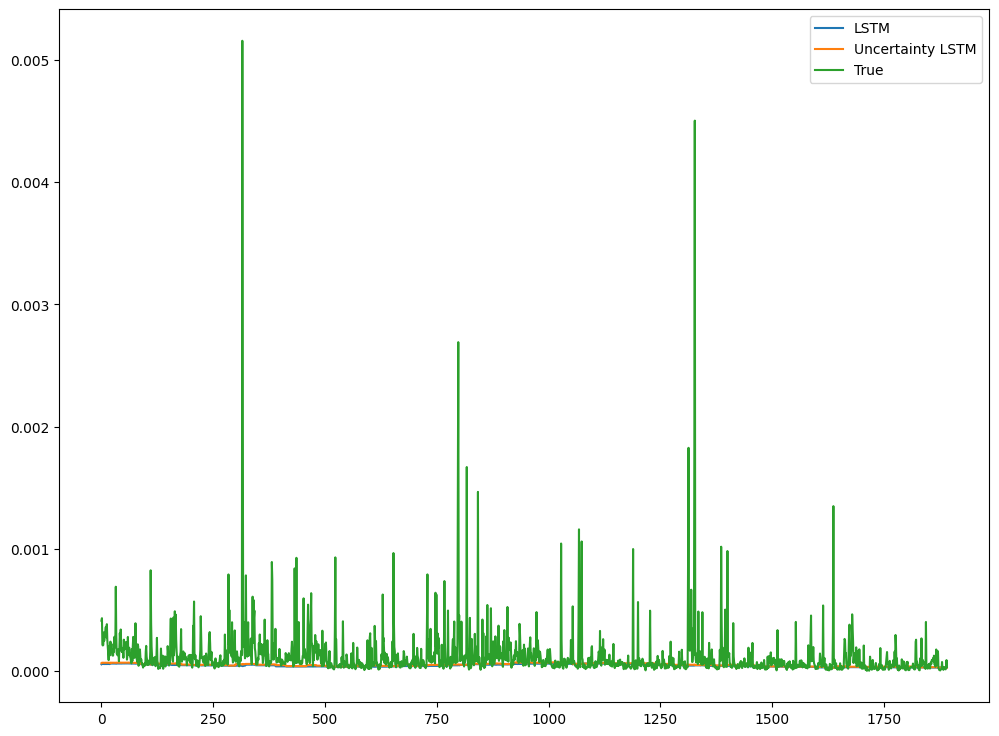

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(transf_path, label="LSTM")
plt.plot(vi_path, label="Uncertainty LSTM")
plt.plot(true, label="True")
plt.legend()
plt.plot()

[]

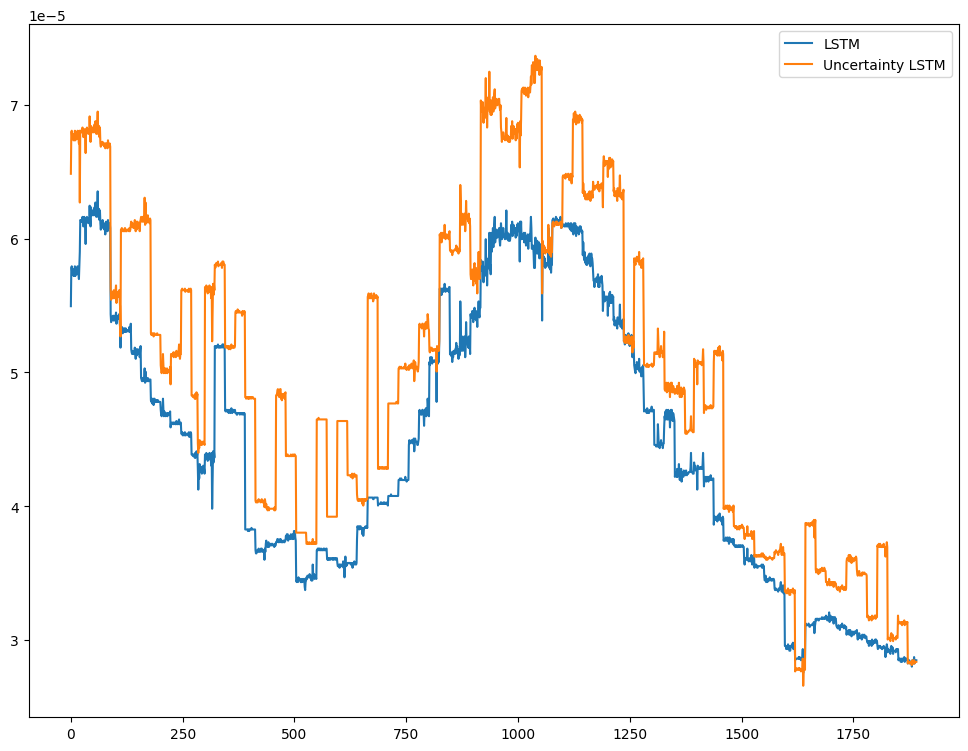

In [53]:
plt.figure(figsize=(12, 9))
plt.plot(transf_path, label="LSTM")
plt.plot(vi_path, label="Uncertainty LSTM")
# plt.plot(true, label="True")
plt.legend()
plt.plot()

In [ ]:
vi_path = []
transf_path = []
true_path = []
for date, row in result.iterrows():
    rmse.append(
        [
            date,
            root_mean_squared_error(row.true_vols, row.model_preds),
            root_mean_squared_error(row.true_vols, row.baseline_preds),
        ]
    )

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")